In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('data/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv('data/test.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Visualization

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

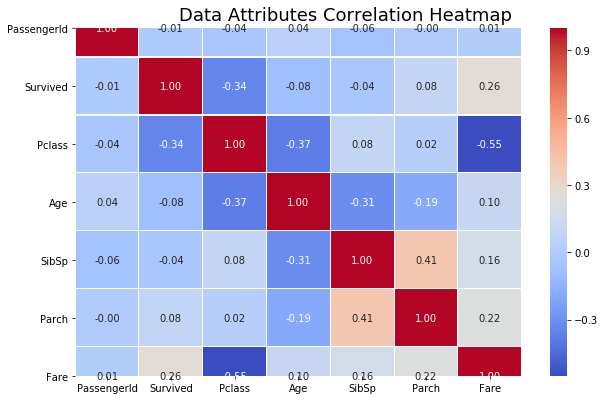

In [6]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = train_data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Data Attributes Correlation Heatmap', fontsize=18)

In [7]:
grouped = train_data.groupby(['Embarked', 'Survived'])
counts =grouped.count()['PassengerId']

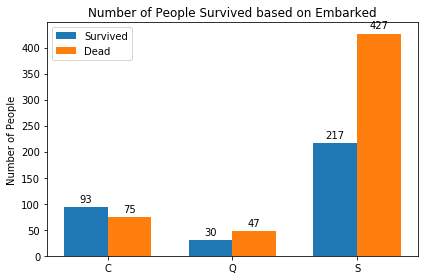

In [8]:
labels = ['C', 'Q', 'S']
survived = [counts[1], counts[3], counts[5]]
dead = [counts[0], counts[2], counts[4]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, survived, width, label='Survived')
rects2 = ax.bar(x + width/2, dead, width, label='Dead')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ٔNumber of People')
ax.set_title('Number of People Survived based on Embarked')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [9]:
grouped = train_data.groupby(['Sex', 'Survived'])
counts = grouped.count()['PassengerId']

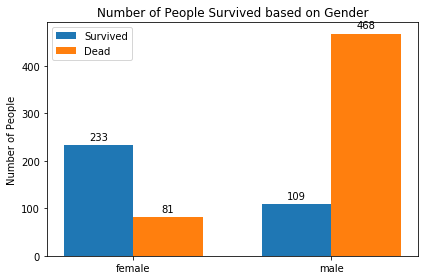

In [10]:
labels = ['female', 'male']
survived = [counts[1], counts[3]]
dead = [counts[0], counts[2]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, survived, width, label='Survived')
rects2 = ax.bar(x + width/2, dead, width, label='Dead')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ٔNumber of People')
ax.set_title('Number of People Survived based on Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

### Data Preprocessing

In [11]:
features = train_data.append(test_data, sort=False, ignore_index=True)
features.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [12]:
features_processed = features.drop(columns=['PassengerId'])

In [13]:
features_processed.shape

(1309, 11)

In [14]:
features_processed['Pclass'] = features_processed['Pclass'].astype(str)

In [15]:
features_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Survived    891 non-null float64
Pclass      1309 non-null object
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 112.6+ KB


In [16]:
features_processed['Title'] = features_processed.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
features_processed

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [17]:
# normalize the titles
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
# map the normalized titles to the current titles 
features_processed.Title = features_processed.Title.map(normalized_titles)
features_processed

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Royalty
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [18]:
print(features_processed.Title.value_counts())

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64


In [19]:
# group by Sex, Pclass, and Title 
grouped = features_processed.groupby(['Sex','Pclass', 'Title'])  
# view the median Age by the grouped features 
grouped.Age.median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        45.0
                Officer    49.0
                Royalty    39.0
        2       Miss       20.0
                Mrs        30.0
        3       Miss       18.0
                Mrs        31.0
male    1       Master      6.0
                Mr         41.5
                Officer    52.0
                Royalty    40.0
        2       Master      2.0
                Mr         30.0
                Officer    41.5
        3       Master      6.0
                Mr         26.0
Name: Age, dtype: float64

In [20]:
features_processed.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

In [21]:
# train_data_processed['Age'] = train_data_processed['Age'].fillna(train_data_processed['Age'].mean())

In [22]:
# test_data_processed['Age'] = test_data_processed['Age'].fillna(train_data_processed['Age'].mean())

In [23]:
features_processed = features_processed.drop(columns=['Cabin'])
# features_processed.Cabin = features_processed.Cabin.fillna('U')
# features_processed.Cabin = features_processed.Cabin.map(lambda x: x[0])

In [24]:
features_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Survived    891 non-null float64
Pclass      1309 non-null object
Name        1309 non-null object
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Embarked    1307 non-null object
Title       1309 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 112.6+ KB


In [25]:
features_processed['Embarked'] = features_processed['Embarked'].fillna(features_processed['Embarked'].mode()[0])

In [26]:
features_processed['Fare'] = features_processed['Fare'].fillna(features_processed['Fare'].mean())

In [27]:
features_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Survived    891 non-null float64
Pclass      1309 non-null object
Name        1309 non-null object
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1309 non-null float64
Embarked    1309 non-null object
Title       1309 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 112.6+ KB


In [28]:
features_processed = features_processed.drop(columns=['Ticket'])

In [29]:
features_processed.drop(columns=['Name', ], inplace=True)

### Data Transforming

In [30]:
features_processed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,3,male,22.0,1,0,7.2500,S,Mr
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs
2,1.0,3,female,26.0,0,0,7.9250,S,Miss
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs
4,0.0,3,male,35.0,0,0,8.0500,S,Mr


In [31]:
features_processed['Family'] = features_processed['SibSp'] + features_processed['Parch']

In [32]:
# features_processed['HasFamily'] = features_processed['Family'].apply(lambda x: 1 if x > 0 else 0)

In [33]:
features_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Survived    891 non-null float64
Pclass      1309 non-null object
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Fare        1309 non-null float64
Embarked    1309 non-null object
Title       1309 non-null object
Family      1309 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 102.4+ KB


In [34]:
from scipy.stats import skew ,boxcox_normmax
from scipy.special import boxcox1p

In [35]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in features_processed.columns:
    if features_processed[i].dtype in numeric_dtypes:
        numerics2.append(i)
skew_features = features_processed[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    features_processed[i] = boxcox1p(features_processed[i], boxcox_normmax(features_processed[i] + 1))

In [36]:
final_features = pd.get_dummies(features_processed).reset_index(drop=True)

In [37]:
final_features.shape

(1309, 20)

### Modeling

In [38]:
X_train = final_features.iloc[:len(train_data), :]
X_test = final_features.iloc[len(train_data):, :]

In [39]:
X_train

,Survived,Age,SibSp,Parch,Fare,Family,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0.0,13.466316,0.585805,0.000000,1.973969,0.635300,0,0,1,0,1,0,0,1,0,0,1,0,0,0
1,1.0,20.966396,0.585805,0.000000,3.744493,0.635300,1,0,0,1,0,1,0,0,0,0,0,1,0,0
2,1.0,15.427386,0.000000,0.000000,2.042508,0.000000,0,0,1,1,0,0,0,1,0,1,0,0,0,0
3,1.0,19.622240,0.585805,0.000000,3.522093,0.635300,1,0,0,1,0,0,0,1,0,0,0,1,0,0
4,0.0,19.622240,0.000000,0.000000,2.054594,0.000000,0,0,1,0,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,15.907278,0.000000,0.000000,2.428298,0.000000,0,1,0,0,1,0,0,1,0,0,0,0,1,0
887,1.0,11.945646,0.000000,0.000000,3.082945,0.000000,1,0,0,1,0,0,0,1,0,1,0,0,0,0
888,0.0,11.427771,0.585805,0.921646,2.890949,1.167596,0,0,1,1,0,0,0,1,0,1,0,0,0,0
889,1.0,15.427386,0.000000,0.000000,3.082945,0.000000,1,0,0,0,1,1,0,0,0,0,1,0,0,0


In [40]:
y_train = X_train['Survived']
X_train.drop(columns=['Survived'], inplace=True)

/home/mma/anaconda3/envs/math_for_ml/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [41]:
X_test.drop(columns=['Survived'], inplace=True)

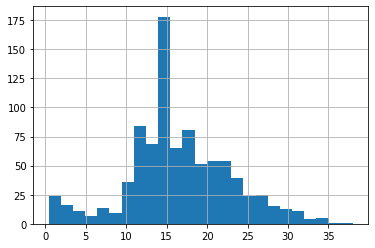

In [42]:
X_train['Age'].hist(bins=25)

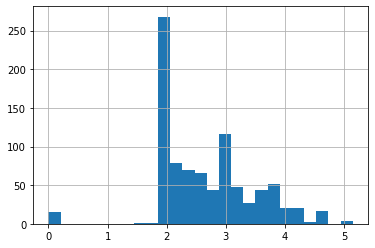

In [43]:
X_train['Fare'].hist(bins=25)

In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [45]:
svc=make_pipeline(StandardScaler(),SVC(random_state=1))
r=[0.0001,0.001,0.1,1,10,50,100]
PSVM=[{'svc__C':r, 'svc__kernel':['linear']},
      {'svc__C':r, 'svc__gamma':r, 'svc__kernel':['rbf']}]
GSSVM=GridSearchCV(estimator=svc, param_grid=PSVM, scoring='accuracy', cv=2)
scores_svm=cross_val_score(GSSVM, X_train.astype(float), y_train,scoring='accuracy', cv=5)

In [46]:
np.mean(scores_svm)

0.8159858528321464

In [47]:
model=GSSVM.fit(X_train, y_train)

In [48]:
pred=model.predict(X_test)
pred = pred.astype(int)

In [49]:
output=pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':pred})

In [50]:
output.to_csv('submission5.csv', index=False)